In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler ,FunctionTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.model_selection import train_test_split ,GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/FCALC')
import fcalc

Mounted at /content/drive


#Error will importing catboost in colab
from catboost import CatBoostClassifier

{{
  ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-59-ab5ad6020305> in <cell line: 17>()
     15 from sklearn.metrics import roc_curve
     16 from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
---> 17 from catboost import CatBoostClassifier
     18
     19 from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

}}

Catboost's plotting option does not work in Google Colab or Jupiter Lab yet.
For now, the 'solution' is to run your code in a regular jupyter notebook instead.
There have been several discussions about this on Github, and catboost team members
have acknowledged the issue. The real solution seems to be that they need to produce
a special extension to enable plotting in Google Colab or Jupiter Lab. Unfortunately
they stated in Oct. 2019 that "We are not working on that, we would very much appreciate

any help!" https://github.com/catboost/catboost/issues/262




In [ ]:
df=pd.read_csv("/content/drive/MyDrive/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

**About Dataset**


**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
df = df.drop(['customerID'], axis = 1)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

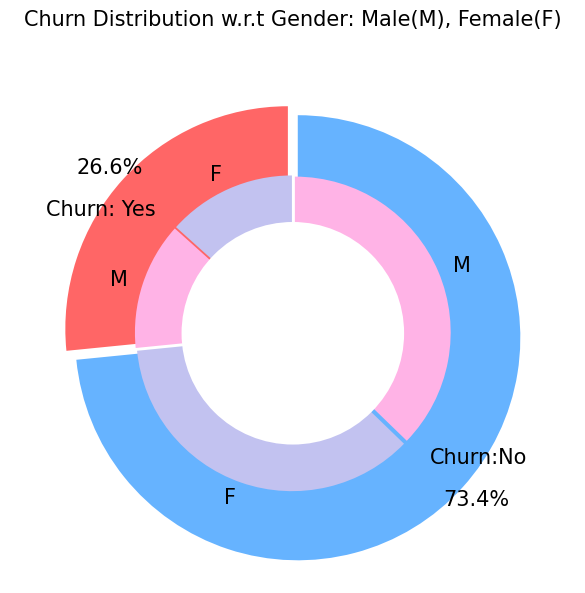

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)
# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

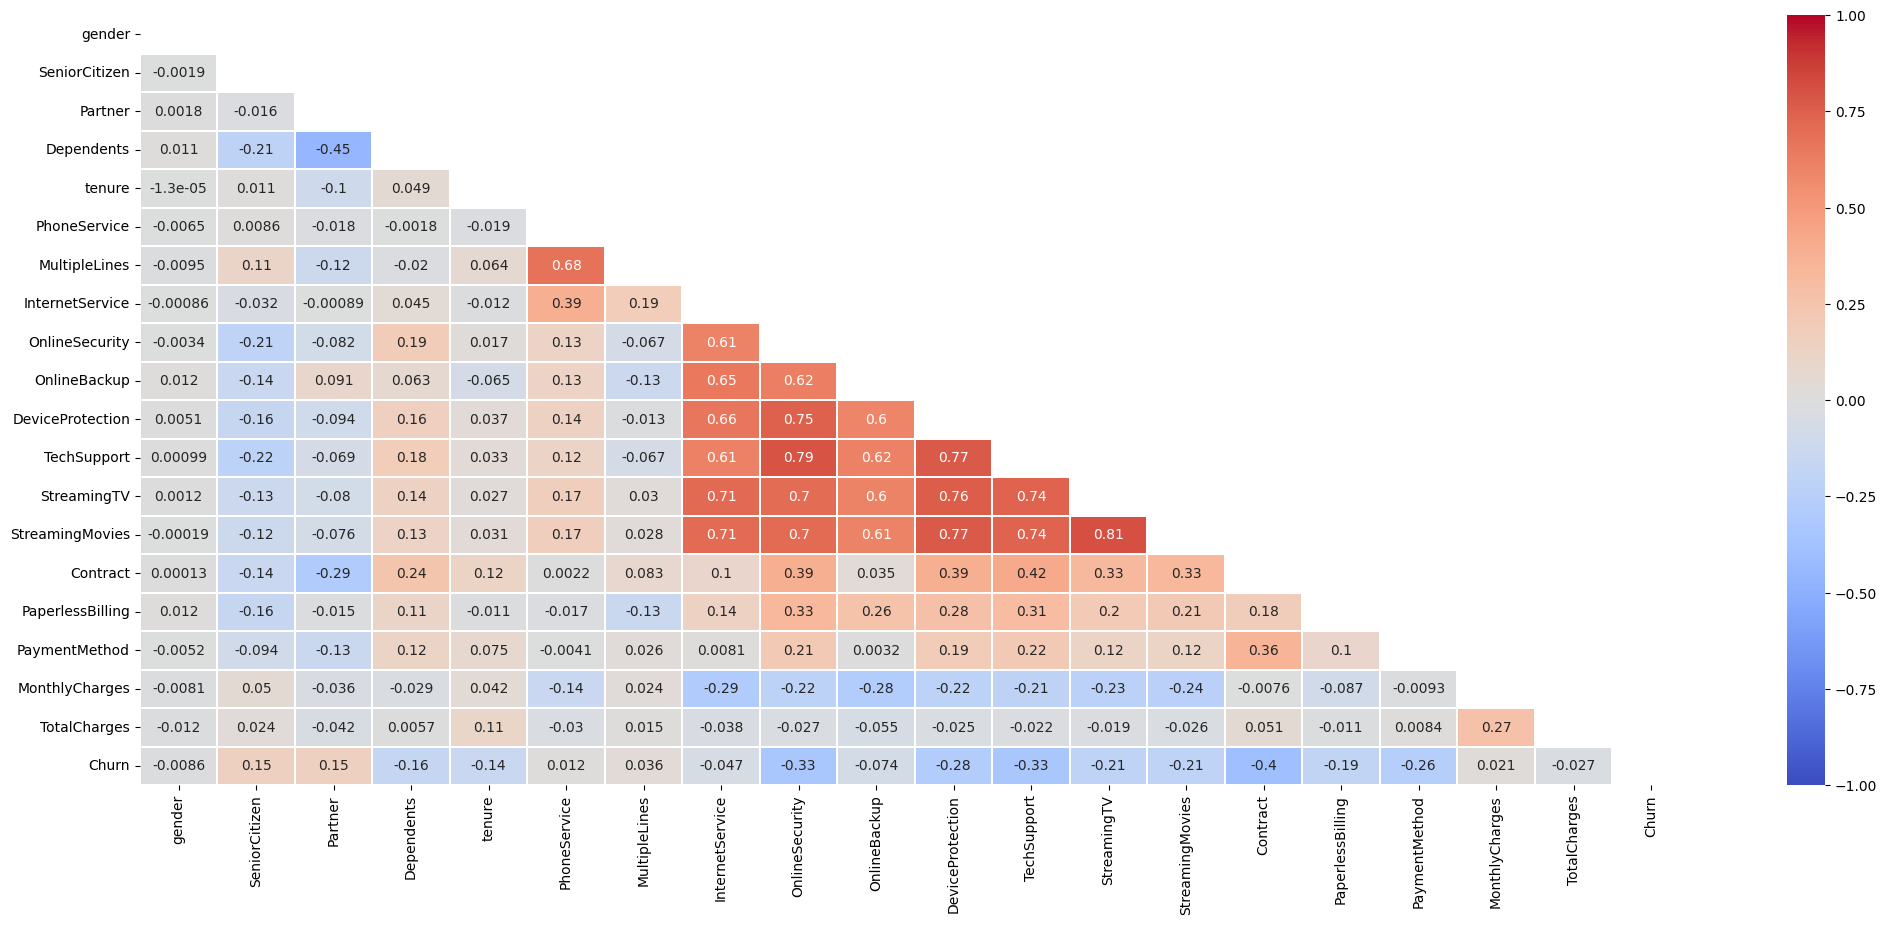

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   int64   
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   int64   
 3   Dependents        7043 non-null   int64   
 4   tenure            7043 non-null   category
 5   PhoneService      7043 non-null   int64   
 6   MultipleLines     7043 non-null   int64   
 7   InternetService   7043 non-null   int64   
 8   OnlineSecurity    7043 non-null   int64   
 9   OnlineBackup      7043 non-null   int64   
 10  DeviceProtection  7043 non-null   int64   
 11  TechSupport       7043 non-null   int64   
 12  StreamingTV       7043 non-null   int64   
 13  StreamingMovies   7043 non-null   int64   
 14  Contract          7043 non-null   int64   
 15  PaperlessBilling  7043 non-null   int64   
 16  PaymentMethod     7043 n

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,1,1,0
1,1,0,0,0,3,1,0,0,2,0,2,0,0,0,1,0,3,2,3,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,2,1,1
3,1,0,0,0,3,0,1,0,2,0,2,2,0,0,1,0,0,2,3,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,3,1,1


In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7681022243256034


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1552
           1       0.57      0.53      0.55       561

    accuracy                           0.77      2113
   macro avg       0.70      0.69      0.70      2113
weighted avg       0.76      0.77      0.77      2113



In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7974443918599148


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.51      0.57       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



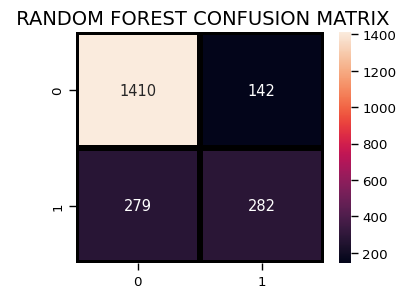

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

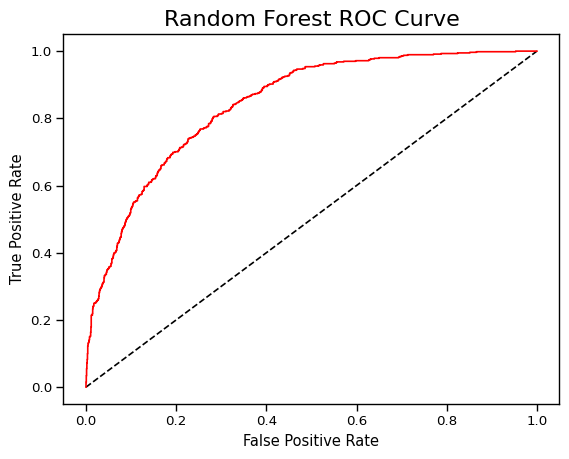

In [ ]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7865593942262187


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1552
           1       0.60      0.58      0.59       561

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.78      0.79      0.79      2113



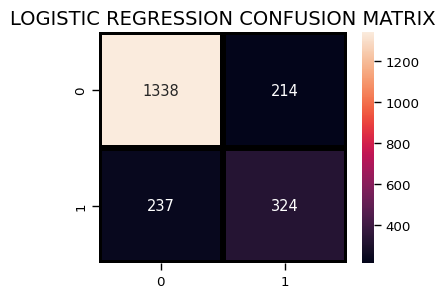

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

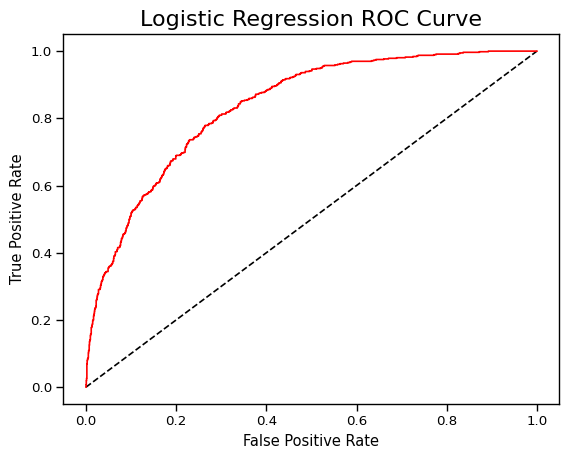

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)


Decision Tree accuracy is : 0.7288215806909607


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1552
           1       0.49      0.52      0.51       561

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [ ]:
# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
# fit model no training data
model_XG = XGBClassifier()
model_XG.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# make predictions for test data
y_pred = model_XG.predict(X_test)
predictions = [round(value) for value in y_pred]


In [ ]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.37%


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.67      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [ ]:
NB = GaussianNB()


In [ ]:
NB.fit(X_train,y_train)

GaussianNB()

In [ ]:
NB.score(X_train,y_train)

0.76105476673428

In [ ]:
YNB_pre = NB.predict(X_test)


In [ ]:
print(classification_report(y_test,YNB_pre))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1552
           1       0.50      0.76      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.75      2113



In [ ]:
scores_KNN = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_KNN)
print('Mean Accuracy:', scores_KNN.mean())


Cross-Validation Scores: [0.74609929 0.78439716 0.76595745 0.76988636 0.76278409 0.75568182
 0.76704545 0.73153409 0.74289773 0.76420455]
Mean Accuracy: 0.7590487991618311


In [ ]:
scores_rf = cross_val_score(model_rf, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_rf)
print('Mean Accuracy:', scores_rf.mean())


Cross-Validation Scores: [0.80567376 0.80141844 0.79432624 0.81534091 0.78409091 0.78693182
 0.81960227 0.80397727 0.78267045 0.81818182]
Mean Accuracy: 0.8012213894261766


In [ ]:
scores_lr = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_lr)
print('Mean Accuracy:', scores_lr.mean())


Cross-Validation Scores: [0.78865248 0.80141844 0.7858156  0.81534091 0.78693182 0.78977273
 0.80681818 0.80539773 0.79403409 0.8125    ]
Mean Accuracy: 0.7986681979368149


In [ ]:
scores_dt = cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_dt)
print('Mean Accuracy:', scores_dt.mean())


Cross-Validation Scores: [0.7248227  0.74893617 0.72624113 0.71022727 0.75852273 0.72159091
 0.734375   0.71306818 0.71590909 0.73011364]
Mean Accuracy: 0.7283806818181818


In [ ]:
scores_NB = cross_val_score(NB, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scoresNB)
print('Mean Accuracy:', scoresNB.mean())

Cross-Validation Scores: [0.76028369 0.75744681 0.75177305 0.77698864 0.76704545 0.72443182
 0.75142045 0.76420455 0.73721591 0.76704545]
Mean Accuracy: 0.7557855818826564


In [ ]:
scores_xg = cross_val_score(model_XG, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_xg)
print('Mean Accuracy:', scores_xg.mean())


Cross-Validation Scores: [0.78297872 0.78865248 0.78439716 0.77272727 0.77272727 0.76846591
 0.79119318 0.77698864 0.78835227 0.80681818]
Mean Accuracy: 0.7833301096067052


In [ ]:
df['tenure'] = pd.qcut( df['tenure'],q=4,labels=['1', '2', '3', '4'])
df['MonthlyCharges'] = pd.qcut( df['MonthlyCharges'],q=4,labels=['1', '2', '3', '4'])
df['TotalCharges'] = pd.qcut( df['TotalCharges'],q=4,labels=['1', '2', '3', '4'])
df = df.apply(lambda x: object_to_int(x))

In [ ]:
df.nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
tenure              4
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
MonthlyCharges      4
TotalCharges        4
Churn               2
dtype: int64

In [ ]:
y = df['Churn'].values
X = df.drop(columns = ['Churn'])
X=pd.get_dummies(X)
X=X.astype('bool')
y = [x==1 for x in y]# taking the max class as true,
y=pd.Series(y)
#subsample
X=X.iloc[:1000,:]
y=y.iloc[:1000]
y.value_counts()

False    744
True     256
dtype: int64

In [ ]:
#X.info()

In [ ]:
#y.info()
#X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [ ]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard-support")

In [ ]:
bin_cls.predict(X_test.values)

In [ ]:
#print(bin_cls.predictions)
#print(y_test)
predicted_y=bin_cls.predictions

In [ ]:

print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions.astype(bool)))


0.7133333333333334
0.47222222222222227


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.79      0.88      0.83       215
         1.0       0.71      0.28      0.40        85

    accuracy                           0.71       300
   macro avg       0.50      0.39      0.41       300
weighted avg       0.77      0.71      0.71       300



In [ ]:
def my_cross_val(model, X, y, n_splits=5):
    # Convert to numpy arrays if input is pandas DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    num_samples = len(X)
    fold_size = num_samples // n_splits
    scores = []

    for i in range(n_splits):
        # Define the indices for the current fold
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else num_samples

        # Create the training and validation sets
        val_idx = list(range(start, end))
        train_idx = [idx for idx in range(num_samples) if idx not in val_idx]

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        y_train=pd.Series(y_train)
        X_train=pd.DataFrame(X_train)
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard")  # Replace with your model's training method

        # Predict on validation set
        #X_test=pd.DataFrame(X_test)
        bin_cls.predict(X_test.values)

        # Calculate accuracy or any other metric of interest
        accuracy = accuracy_score(y_test, bin_cls.predictions)  # Replace with your own metric

        scores.append(accuracy)

    return scores


In [ ]:
scores_bin1 = my_cross_val(bin_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin1)
print('Mean Accuracy:', pd.Series(scores_bin1).mean())

Cross-Validation Scores: [0.82, 0.8166666666666667, 0.81, 0.8066666666666666, 0.81, 0.8133333333333334, 0.8133333333333334, 0.8133333333333334, 0.8166666666666667, 0.81]
Mean Accuracy: 0.8130000000000001


In [ ]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard")

In [ ]:
bin_cls.predict(X_test.values)

In [ ]:
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions.astype(bool)))

0.7133333333333334
0.46478873239436624


In [ ]:
predicted_y=bin_cls.predictions

In [ ]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.79      0.89      0.83       215
         1.0       0.72      0.27      0.39        85

    accuracy                           0.71       300
   macro avg       0.50      0.39      0.41       300
weighted avg       0.77      0.71      0.71       300



In [ ]:
def my_cross_val(model, X, y, n_splits=5):
    # Convert to numpy arrays if input is pandas DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    num_samples = len(X)
    fold_size = num_samples // n_splits
    scores = []

    for i in range(n_splits):
        # Define the indices for the current fold
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else num_samples

        # Create the training and validation sets
        val_idx = list(range(start, end))
        train_idx = [idx for idx in range(num_samples) if idx not in val_idx]

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        y_train=pd.Series(y_train)
        X_train=pd.DataFrame(X_train)
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard-support")  # Replace with your model's training method

        # Predict on validation set
        #X_test=pd.DataFrame(X_test)
        bin_cls.predict(X_test.values)

        # Calculate accuracy or any other metric of interest
        accuracy = accuracy_score(y_test, bin_cls.predictions)  # Replace with your own metric

        scores.append(accuracy)

    return scores


In [ ]:
scores_bin2 = my_cross_val(bin_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin2)
print('Mean Accuracy:', pd.Series(scores_bin2).mean())

Cross-Validation Scores: [0.82, 0.8166666666666667, 0.8133333333333334, 0.8066666666666666, 0.8133333333333334, 0.8133333333333334, 0.8133333333333334, 0.8133333333333334, 0.8166666666666667, 0.8133333333333334]
Mean Accuracy: 0.8139999999999998


In [ ]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="ratio-support ")

In [ ]:
bin_cls.predict(X_test.values)

In [ ]:
predicted_y=bin_cls.predictions

In [ ]:
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions.astype(bool)))

0.7166666666666667
0.0


In [ ]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

       False       0.72      1.00      0.83       215
        True       0.00      0.00      0.00        85

    accuracy                           0.72       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.72      0.60       300



In [ ]:
def my_cross_val(model, X, y, n_splits=5):
    # Convert to numpy arrays if input is pandas DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    num_samples = len(X)
    fold_size = num_samples // n_splits
    scores = []

    for i in range(n_splits):
        # Define the indices for the current fold
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else num_samples

        # Create the training and validation sets
        val_idx = list(range(start, end))
        train_idx = [idx for idx in range(num_samples) if idx not in val_idx]

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        y_train=pd.Series(y_train)
        X_train=pd.DataFrame(X_train)
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="ratio-support")  # Replace with your model's training method

        # Predict on validation set
        #X_test=pd.DataFrame(X_test)
        bin_cls.predict(X_test.values)

        # Calculate accuracy or any other metric of interest
        accuracy = accuracy_score(y_test, bin_cls.predictions)  # Replace with your own metric

        scores.append(accuracy)

    return scores


In [ ]:
scores_bin3 = my_cross_val(bin_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin3)
print('Mean Accuracy:', pd.Series(scores_bin3).mean())

Cross-Validation Scores: [0.7933333333333333, 0.7833333333333333, 0.7966666666666666, 0.7933333333333333, 0.7933333333333333, 0.7866666666666666, 0.79, 0.78, 0.7966666666666666, 0.7933333333333333]
Mean Accuracy: 0.7906666666666666


In [ ]:
pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(), categorical=np.arange(X_train.shape[1]))

In [ ]:
pat_cls.predict(X_test.values)

In [ ]:
predicted_y=pat_cls.predictions

In [ ]:
print(accuracy_score(y_test, pat_cls.predictions))
print(f1_score(y_test, pat_cls.predictions.astype('bool')))

0.77
0.5241379310344828


In [ ]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

       False       0.80      0.90      0.85       215
        True       0.63      0.45      0.52        85

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.69       300
weighted avg       0.76      0.77      0.76       300



In [ ]:
def my_cross_val(model, X, y, n_splits=5):
    # Convert to numpy arrays if input is pandas DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    num_samples = len(X)
    fold_size = num_samples // n_splits
    scores = []

    for i in range(n_splits):
        # Define the indices for the current fold
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else num_samples

        # Create the training and validation sets
        val_idx = list(range(start, end))
        train_idx = [idx for idx in range(num_samples) if idx not in val_idx]

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        y_train=pd.Series(y_train)
        X_train=pd.DataFrame(X_train)
        pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(), categorical=np.arange(X_train.shape[1]))  # Replace with your model's training method

        # Predict on validation set
        #X_test=pd.DataFrame(X_test)
        pat_cls.predict(X_test.values)

        # Calculate accuracy or any other metric of interest
        accuracy = accuracy_score(y_test, pat_cls.predictions)  # Replace with your own metric

        scores.append(accuracy)

    return scores


In [ ]:
scores_bin4 = my_cross_val(pat_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin4)
print('Mean Accuracy:', pd.Series(scores_bin4).mean())

Cross-Validation Scores: [0.97, 0.96, 0.9566666666666667, 0.9433333333333334, 0.9666666666666667, 0.97, 0.9633333333333334, 0.96, 0.9666666666666667, 0.9666666666666667]
Mean Accuracy: 0.9623333333333333
